# Fashion MNIST

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [4]:
mnist = keras.datasets.fashion_mnist
(training_data, training_label),(test_data,test_label) = mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


9
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.  

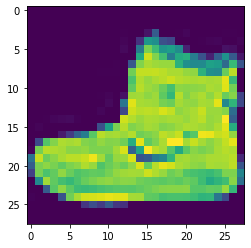

In [9]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0])
print(training_label[0])
print(training_data[0])

In [6]:
# normalizing data
training_data = training_data / 255.0
test_data = test_data / 255.0

In [8]:
# Define model
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(125, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

> `Sequential` means sequence of neural network

> `Flatten` means take input image into one dimensional matrix

> `Relu` means activation function which not return anything that smaller than zero but returning the value if it was more than zero

> `Softmax` means take the biggest in the set

In [11]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_data,training_label,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4970 - accuracy: 0.8246
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3735 - accuracy: 0.8658
Epoch 3/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3377 - accuracy: 0.8784
Epoch 4/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3125 - accuracy: 0.8852
Epoch 5/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2961 - accuracy: 0.8920


In [12]:
model.evaluate(test_data,test_label)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3473 - accuracy: 0.8744


[0.34726150183677673, 0.8744]

In [15]:
classifications = model.predict(test_data)

print(classifications[0])
print(test_label[0])

[1.4836380e-05 6.2371038e-07 1.2136735e-06 3.0589061e-07 4.1508324e-06
 1.7442776e-02 4.2473930e-05 6.9862887e-02 1.1682476e-04 9.1251391e-01]
9


In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.8):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.4766 - accuracy: 0.8303
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4764 - accuracy: 0.8304
